Importing Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preprocessing

In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)






Found 3115 files belonging to 36 classes.


In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


Found 351 files belonging to 36 classes.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
cnn=tf.keras.models.Sequential()


Building CNN2D(filter size =3x3,rgb üzerinde important featureları çıkarıyoruz.)

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))#36 tane output classımız(label) var dolayısıyla fc katmanı 36 nöronlu olmak zorunda

COMPILING AND TRAINING PHASE

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.0654 - loss: 3.6060 - val_accuracy: 0.3077 - val_loss: 2.5455
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2513 - loss: 2.5792 - val_accuracy: 0.6467 - val_loss: 1.4551
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.4853 - loss: 1.8361 - val_accuracy: 0.7607 - val_loss: 1.0285
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6406 - loss: 1.3540 - val_accuracy: 0.8718 - val_loss: 0.5815
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7949 - loss: 0.8451 - val_accuracy: 0.9288 - val_loss: 0.4025
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8718 - loss: 0.5347 - val_accuracy: 0.9487 - val_loss: 0.3078
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9226 - loss: 0.3581 - val_accuracy: 0.9573 - val_loss: 0.2710
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9546 - loss: 0.2120 - val_accuracy: 0.9345 - v

In [ ]:
cnn.save("/content/drive/MyDrive/trained_model.h5")
with open("/content/drive/MyDrive/training_model.json", "w") as f:
    json.dump(training_history.history, f)


In [ ]:

print(training_history.history)
print(f"Validation set accuracy:{(training_history.history['val_accuracy'][-1]*100)}")


{'accuracy': [0.10112359374761581, 0.3020866811275482, 0.5110754370689392, 0.6744783520698547, 0.8211877942085266, 0.8892455697059631, 0.9367576241493225, 0.9646869897842407, 0.9749598503112793, 0.9820224642753601, 0.9861958026885986, 0.9842696785926819, 0.9845907092094421, 0.9865168333053589, 0.9868378639221191, 0.9887640476226807, 0.9884430170059204, 0.9897271394729614, 0.9865168333053589, 0.9894061088562012, 0.9894061088562012, 0.9890850782394409, 0.9887640476226807, 0.9894061088562012, 0.9897271394729614, 0.9894061088562012, 0.9903692007064819, 0.9884430170059204, 0.9897271394729614, 0.9894061088562012], 'loss': [3.31567645072937, 2.426967144012451, 1.7711941003799438, 1.2377790212631226, 0.767221212387085, 0.48674413561820984, 0.3089860677719116, 0.1837271898984909, 0.1388976275920868, 0.11090771108865738, 0.0929863378405571, 0.07735782116651535, 0.08001422137022018, 0.07411490380764008, 0.07440342009067535, 0.06684351712465286, 0.06759300082921982, 0.06002133712172508, 0.06352147

In [ ]:
cnn=tf.keras.models.load_model("/content/trained_model.h5")

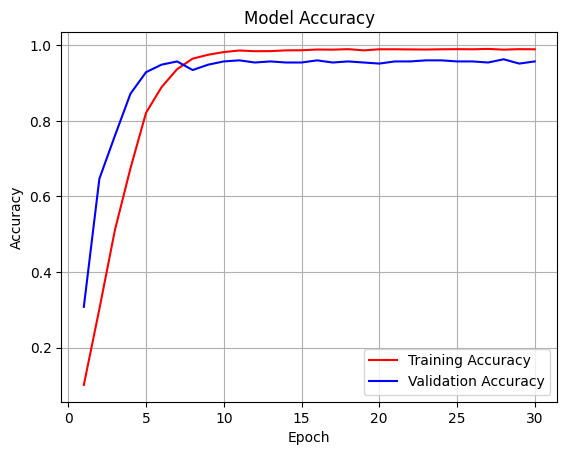

In [ ]:
epochs = list(range(1, 31))
plt.plot(epochs, training_history.history['accuracy'], color="red", label="Training Accuracy")
plt.plot(epochs, training_history.history['val_accuracy'], color="blue", label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
